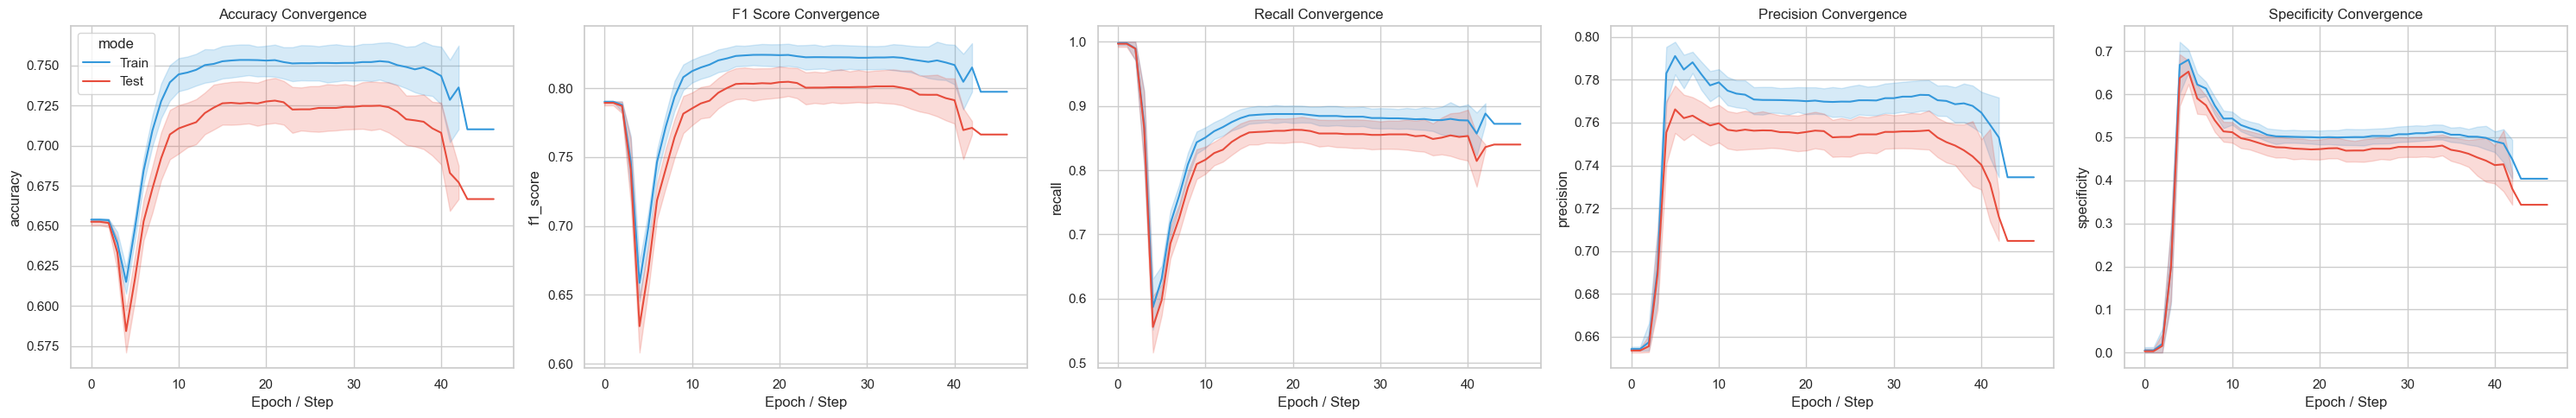

In [8]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

with open('../../models/AM/tictactoe_spec_sens.json', 'r') as f:
     data = json.load(f)

def parse_training_history(json_data):

    records = []

    for run_id, run_content in json_data.items():
        for fold_id, fold_content in run_content.items():
            history = fold_content.get('history', {})
            
            for mode in ['train', 'test']:
                if mode in history:
                    steps = history[mode]
                    for step_index, metrics in enumerate(steps):
                        row = {
                            'run': run_id,
                            'fold': fold_id,
                            'mode': mode.capitalize(),
                            'step': step_index
                        }
                        row.update(metrics)
                        records.append(row)
    
    return pd.DataFrame(records)


df = parse_training_history(data)


def plot_convergence(df):
    metric_columns = [c for c in df.columns if c not in ['run', 'fold', 'mode', 'step']]
    
    sns.set_theme(style="whitegrid")
    
    n_metrics = len(metric_columns)
    fig, axes = plt.subplots(1, n_metrics, figsize=(6 * n_metrics, 5))
    
    if n_metrics == 1:
        axes = [axes]

    for i, metric in enumerate(metric_columns):
        ax = axes[i]

        sns.lineplot(
            data=df,
            x="step", 
            y=metric, 
            hue="mode", 
            style="mode",
            markers=False, 
            dashes=False, 
            ax=ax,
            palette=["#3498db", "#e74c3c"]
        )
        
        ax.set_title(f'{metric.replace("_", " ").title()} Convergence')
        ax.set_xlabel("Epoch / Step")
        ax.set_ylabel(metric)
        
        if i > 0:
            ax.get_legend().remove()

    plt.tight_layout()
    plt.show()

plot_convergence(df)